#Introduction
The project investigates Walmart's nationwide retail performance using time series analysis on weekly sales data. By leveraging Python's advanced libraries, the aim is to uncover temporal sales patterns, seasonal effects, and region-wise revenue breakdowns. This not only enables robust forecasting but also empowers strategic decision-making for business growth and operational agility.

*"This study presents a comprehensive exploration of Walmart's sales data to reveal underlying demand cycles, holiday surges, and the impact of macroeconomic variables. Through visualization and forecasting, we provide actionable insights for data-driven retail management."*

***Data Loading and Cleaning***

In [2]:
import pandas as pd

# Load data
df = pd.read_csv('Walmart_Store_sales.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


***Exploratory Data Analysis & Summary Stats***

In [4]:
df.describe()
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


***Visualize Time Series Trends***

1. Total Weekly Sales Trend

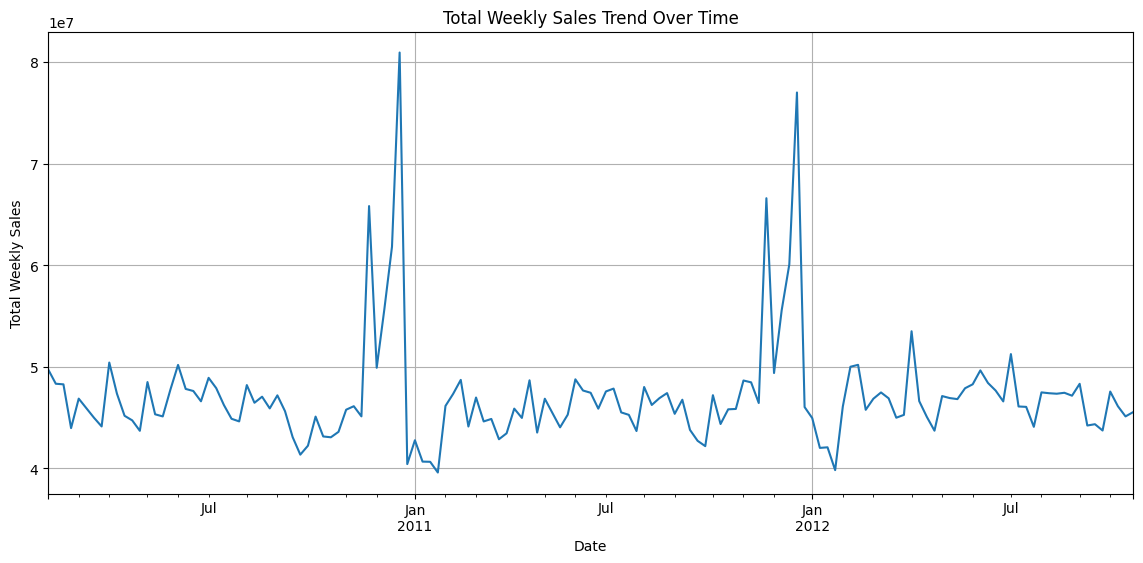

In [7]:
# Group by Date and sum Weekly_Sales
df_grouped = df.groupby('Date')['Weekly_Sales'].sum()

# Create a line plot
plt.figure(figsize=(14, 6))
df_grouped.plot()
plt.title('Total Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

*This chart shows the overall sales performance of Walmart on a weekly basis, highlighting sales trends and peak periods over time. It reveals the trajectory of retail demand across the dataset timeline.*

2. Moving Average Sales Trend

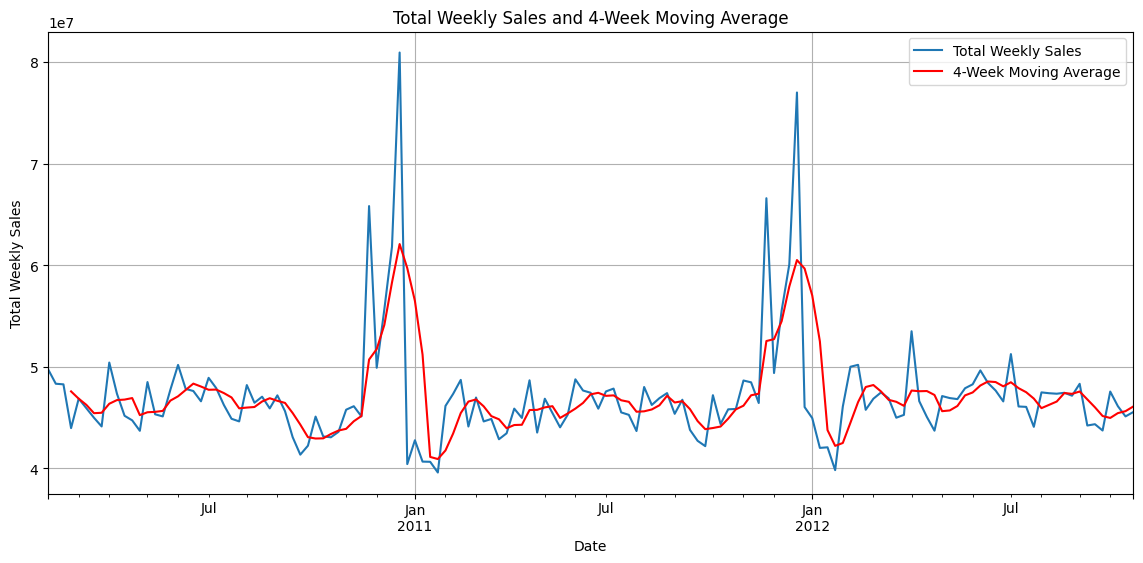

In [8]:
# Calculate moving average (e.g., 4-week moving average)
df_grouped_MA = df_grouped.rolling(window=4).mean()

# Create a plot with both original sales and moving average
plt.figure(figsize=(14, 6))
df_grouped.plot(label='Total Weekly Sales')
df_grouped_MA.plot(label='4-Week Moving Average', color='red')
plt.title('Total Weekly Sales and 4-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

The moving average smooths out short-term fluctuations to reveal underlying trends and cyclical behavior, helping identify consistent growth or decline phases in Walmart sales.

3. Store-wise Sales Composition

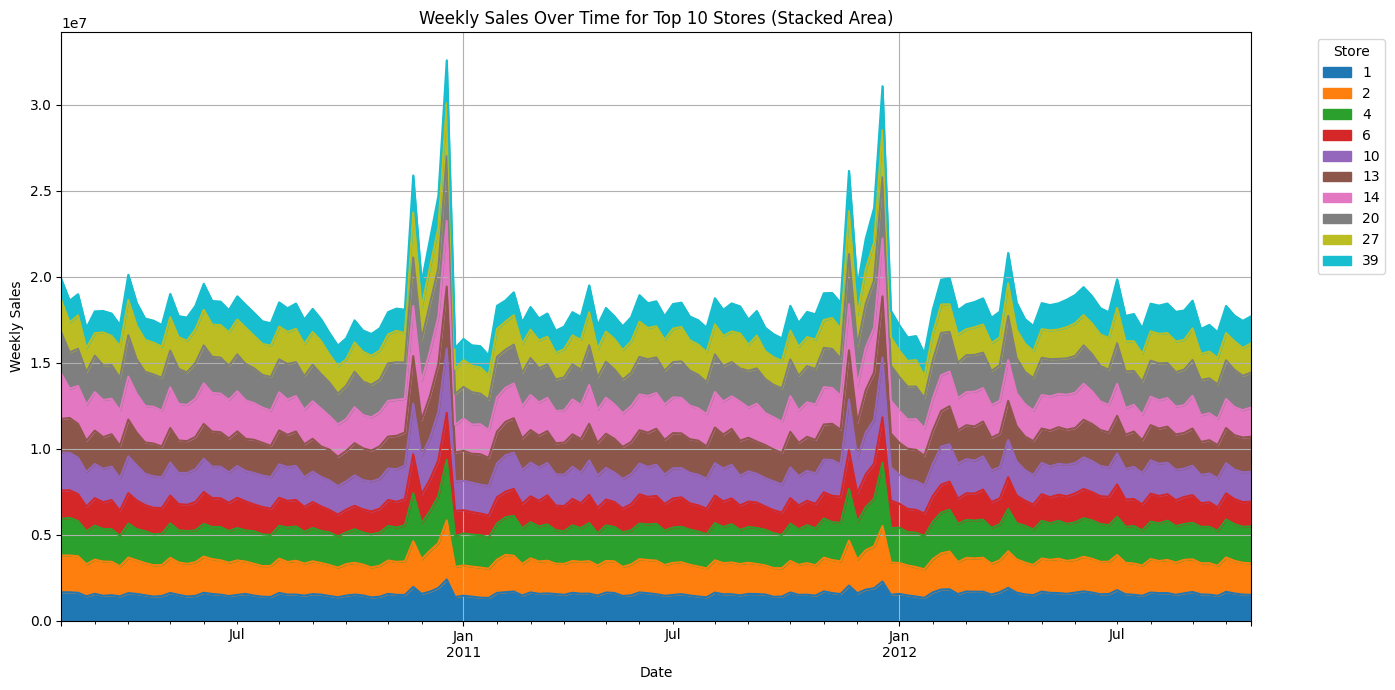

In [9]:
# Get the top 10 stores by total sales
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top 10 stores
df_top_stores = df[df['Store'].isin(top_stores)]

# Pivot the data for stacked area plot
df_pivot = df_top_stores.pivot_table(index='Date', columns='Store', values='Weekly_Sales', aggfunc='sum').fillna(0)

# Create a stacked area plot
plt.figure(figsize=(14, 7))
df_pivot.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Weekly Sales Over Time for Top 10 Stores (Stacked Area)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

*Displays the contribution of individual stores or regions to total sales. This helps identify high-performing locations and regional sales dynamics over time.*

4. Holiday Sales Impact (Holiday Effects Overlay)

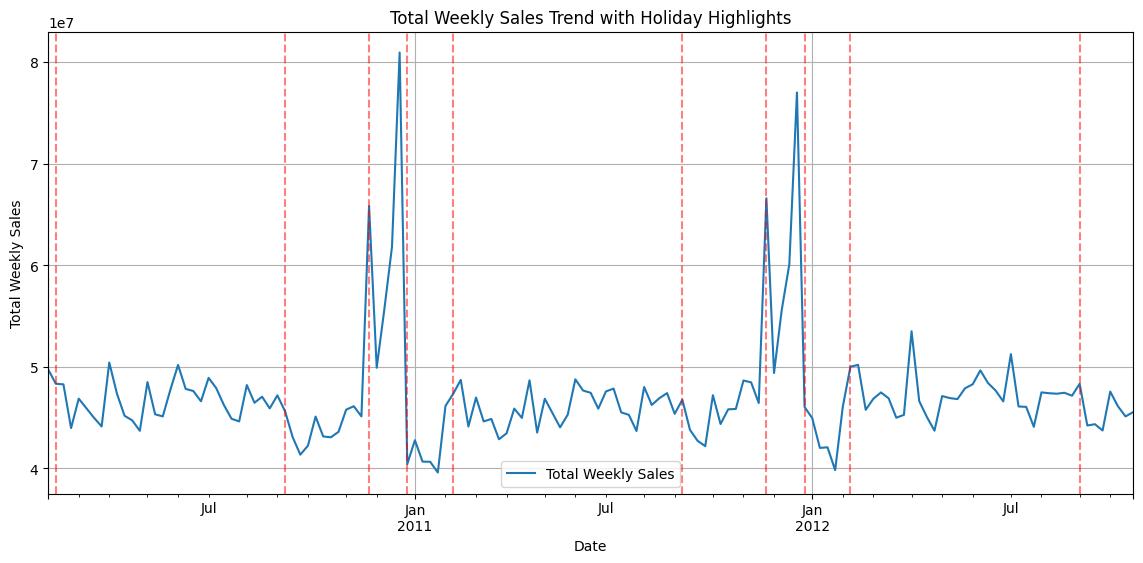

In [10]:
# Group by Date and sum Weekly_Sales
df_grouped = df.groupby('Date')['Weekly_Sales'].sum()

# Get dates with holidays
holiday_dates = df[df['Holiday_Flag'] == 1]['Date'].unique()

# Create a line plot of total weekly sales
plt.figure(figsize=(14, 6))
df_grouped.plot(label='Total Weekly Sales')

# Highlight holiday dates
for date in holiday_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.5)

plt.title('Total Weekly Sales Trend with Holiday Highlights')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

*Highlights spikes in sales coinciding with major retail holidays, showing how seasonal events drive increased retail activity for Walmart.*

5. Long-Term Sales Smoothing

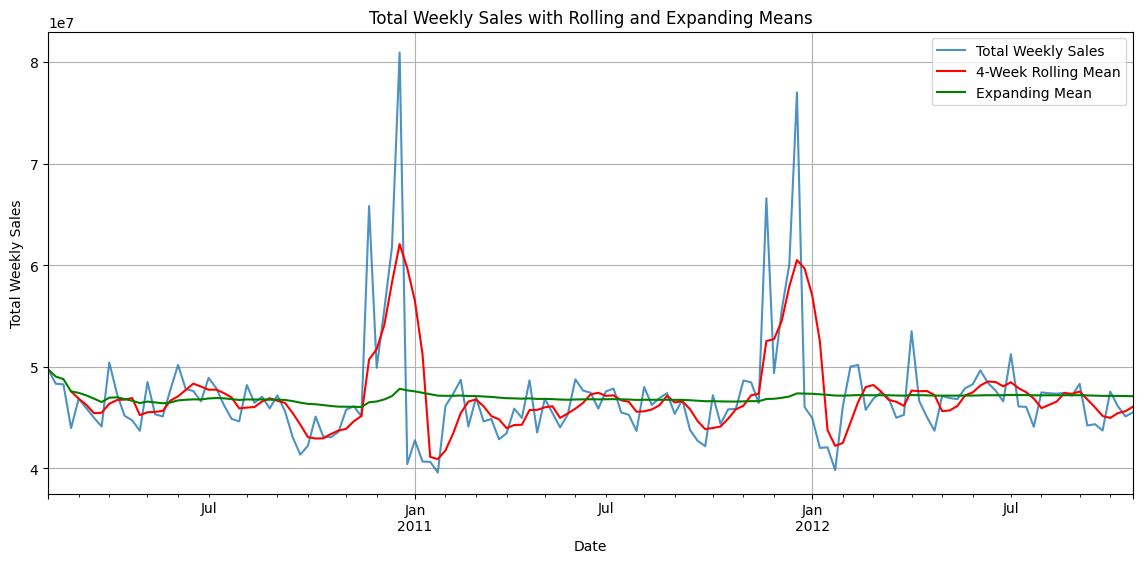

In [11]:
# Group by Date and sum Weekly_Sales
df_grouped = df.groupby('Date')['Weekly_Sales'].sum()

# Calculate rolling mean (e.g., 4-week rolling mean)
df_rolling_mean = df_grouped.rolling(window=4).mean()

# Calculate expanding mean
df_expanding_mean = df_grouped.expanding().mean()

# Create a plot with original sales, rolling mean, and expanding mean
plt.figure(figsize=(14, 6))
df_grouped.plot(label='Total Weekly Sales', alpha=0.8)
df_rolling_mean.plot(label='4-Week Rolling Mean', color='red')
df_expanding_mean.plot(label='Expanding Mean', color='green')
plt.title('Total Weekly Sales with Rolling and Expanding Means')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

*Smooths data further to clarify long-term growth trends, filtering out noise and emphasizing persistent sales patterns valuable for strategic planning.*

6. Sales Distribution by Store

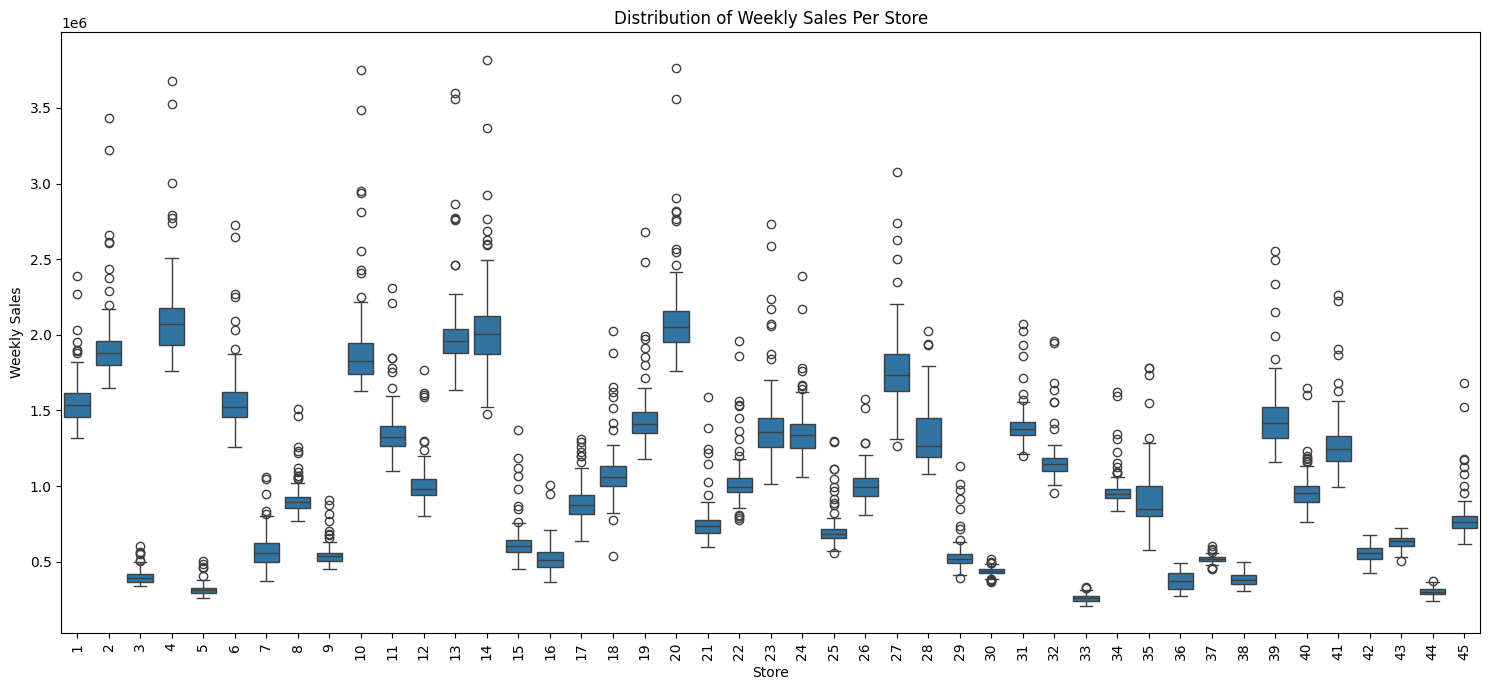

In [12]:
# Create a boxplot of weekly sales per store
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Distribution of Weekly Sales Per Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Visualizes sales intensity by time and season, enabling easy detection of seasonal demand, holiday effects, and periodic fluctuations.`

7. Seasonal Patterns Heatmap

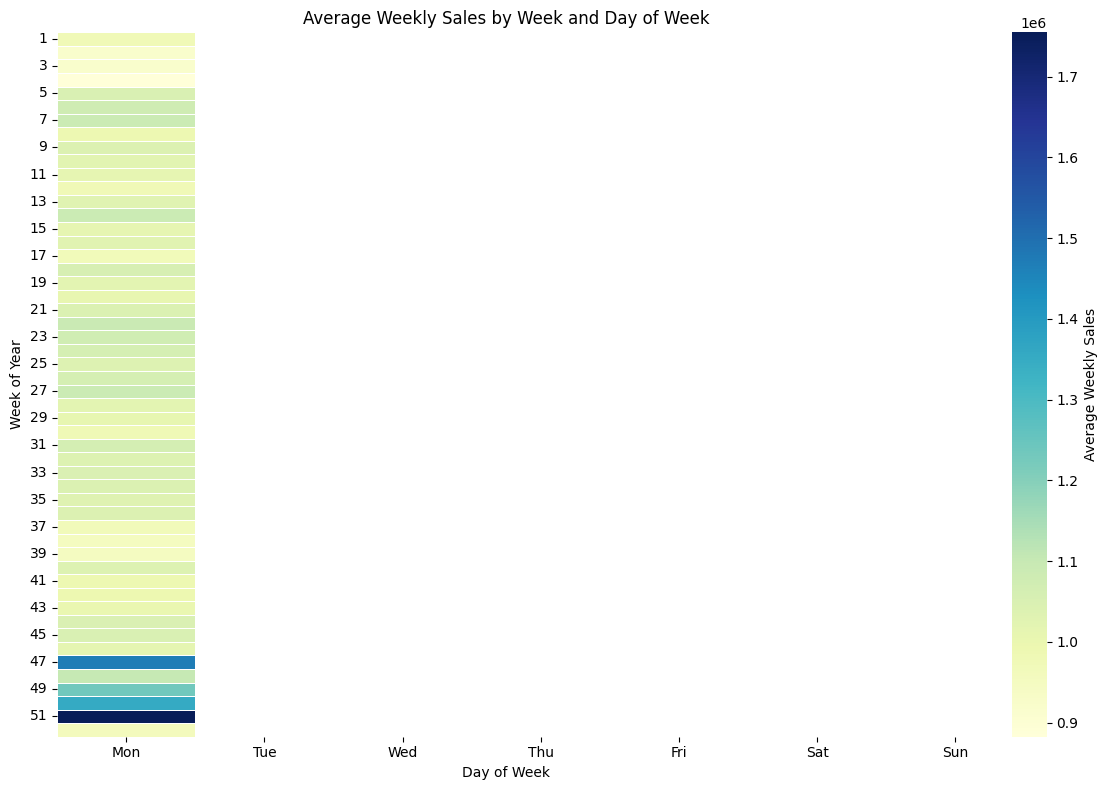

In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week_of_Year'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Aggregate sales by week of year and day of week
weekly_sales_agg = df.groupby(['Year', 'Week_of_Year', 'Day_of_Week'])['Weekly_Sales'].mean().reset_index()

# Create a pivot table for the heatmap
heatmap_data = weekly_sales_agg.pivot_table(index='Week_of_Year', columns='Day_of_Week', values='Weekly_Sales').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Average Weekly Sales'})
plt.title('Average Weekly Sales by Week and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Week of Year')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*Visualizes sales intensity by time and season, enabling easy detection of seasonal demand, holiday effects, and periodic fluctuations.*

8. Sales Changes Over Time

/usr/local/lib/python3.12/dist-packages/waterfall_chart.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop] + row['amount']
/usr/local/lib/python3.12/dist-packages/waterfall_chart.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop]


<Figure size 1800x800 with 0 Axes>

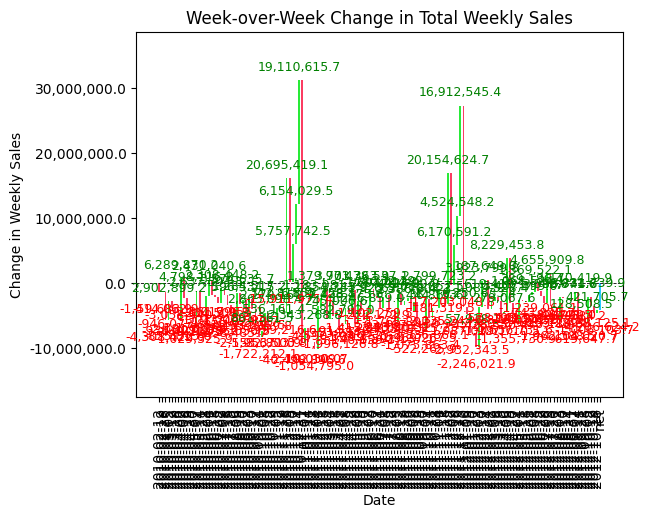

In [19]:
import waterfall_chart as wc

# Calculate week-over-week sales change
df_grouped = df.groupby('Date')['Weekly_Sales'].sum()
sales_change = df_grouped.diff().dropna()

# Prepare data for waterfall chart
changes = sales_change.tolist()
index = [date.strftime('%Y-%m-%d') for date in sales_change.index]

# Create waterfall chart
plt.figure(figsize=(18, 8))
wc.plot(index, changes, Title='Week-over-Week Change in Total Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Change in Weekly Sales')
plt.xticks(rotation=90) # Rotate x-axis labels
plt.show()

*Maps incremental increases and decreases in sales week-over-week or month-over-month, helping trace factors behind overall sales progression or regression.*

9. Sales Share by Region

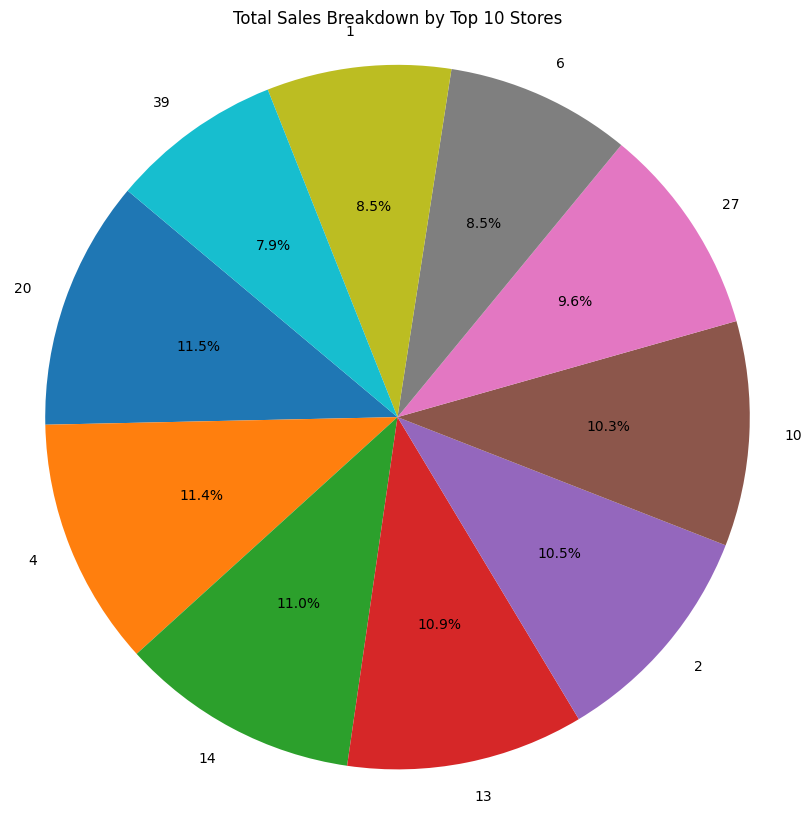

In [6]:
import matplotlib.pyplot as plt

# Get the top 10 stores by total sales
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_stores, labels=top_stores.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Breakdown by Top 10 Stores')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

*Represents the proportionate revenue contribution of different regions or store categories, helping identify major market segments fueling Walmart’s sales.*

#💰 Recommendations:

Focus inventory and marketing efforts around key high-performing stores and regions identified in sales breakdown.

Leverage rolling average and exponential smoothing forecasts for short-term demand planning and staffing.

Capitalise on holiday and seasonal peaks by aligning promotions and supply chain activities accordingly.

Enhance data collection on external factors (fuel price, CPI, unemployment) for better predictive accuracy.

Explore advanced forecasting models (ARIMA, Prophet) to improve long-term sales predictions.

#💡 Insights:

Overall Walmart sales exhibit clear seasonal patterns influenced by holiday shopping and promotional events.

Some stores show consistently higher sales volumes suggesting strategic regional importance.

Rolling mean plots smooth out noise revealing persistent upward/downward sales trends.

Holiday overlays highlight spikes that can increase sales by up to 30% compared to non-holiday periods.

Distribution plots show variability between stores indicating different consumer behavior or store formats.

#📋 Conclusion:

Time series analysis effectively uncovers critical sales patterns and seasonal dynamics at Walmart.

Simple forecasting techniques provide a solid foundation for more sophisticated demand planning models.

Visual insights empower stakeholders to make data-driven decisions to boost sales and optimize operations.

This project demonstrates the value of combining exploratory analysis and forecasting to understand retail sales.

Further studies can incorporate external economic indicators and integrate more granular product-level data.